# Preparing Dataset 

In [25]:
import pandas as pd 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns 
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [26]:
df= pd.read_csv('polish_dataset.csv')
df.head()

C:\Users\Mohanad alotaibe\AppData\Local\Temp\ipykernel_6744\368176039.py:1: DtypeWarning: Columns (0,1,2,5,6,8,9,10,12,13,14,17,18,19,21,22,24,28,29,30,34,35,37,38,41,42,43,47,48,50,54,55,56,57,58,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('polish_dataset.csv')


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


## Data Cleaning & convert data

In [27]:

df.replace('?', pd.NA, inplace=True)

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)


# Check the null values :

In [28]:
df.isnull().sum()


Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

# Data Splitting

In [29]:
x = df.drop(columns=['class'], axis=1) 

y = df['class']
x.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.200550,0.37951,0.396410,2.0472,32.351,0.388250,0.249760,1.33050,1.1389,0.50494,...,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770
8,0.009020,0.63202,0.053735,1.1263,-37.842,0.000000,0.014434,0.58223,1.3332,0.36798,...,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.56030
12,0.266690,0.34994,0.611470,3.0243,43.087,0.559830,0.332070,1.85770,1.1268,0.65006,...,5340.0000,0.112500,0.410250,0.88750,0.073630,9.5593,5.6298,38.168,9.5629,33.41300
13,0.067731,0.19885,0.081562,2.9576,90.606,0.212650,0.078063,4.02900,1.2570,0.80115,...,15132.0000,0.204440,0.084542,0.79556,0.196190,8.2122,2.7917,60.218,6.0613,0.28803
14,-0.029182,0.21131,0.452640,7.5746,57.844,0.010387,-0.034653,3.73240,1.0241,0.78869,...,34549.0000,0.023565,-0.037001,0.97644,0.180630,3.4646,11.3380,31.807,11.4750,1.65110


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=123)


In [31]:
print(y_train.value_counts())

class
0    13474
1      297
Name: count, dtype: int64


In [32]:
print(y_test.value_counts())

class
0    5774
1     128
Name: count, dtype: int64


In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(x_train, y_train)

feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

threshold = 0.017   
important_features = feature_importances_df[feature_importances_df['importance'] > threshold]
selected_features = important_features['feature'].tolist()

x_selected = x[selected_features]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.30, random_state=123)
print(y_train.value_counts())
print(y_test.value_counts())
x_train.head()

class
0    13457
1      314
Name: count, dtype: int64
class
0    5791
1     111
Name: count, dtype: int64


,Attr24,Attr46,Attr34,Attr58,Attr56,Attr26,Attr39,Attr9,Attr35,Attr47,Attr27,Attr41,Attr29,Attr13,Attr15,Attr60,Attr5
20945,0.005394,1.05190,6.398300,0.99962,-0.011544,0.221880,-0.011544,3.83710,-0.044294,6.0665,1.00350,0.130710,2.3674,0.035507,1625.20,59.4790,2.5715
1555,0.230130,1.25220,0.199850,0.94709,0.052912,0.179920,0.056955,1.05590,0.119900,65.2460,0.60137,0.132820,4.2846,0.061012,1704.90,5.9068,16.9710
33869,0.113880,3.57750,4.957600,0.85221,0.153530,0.460050,0.074008,1.84420,0.136480,58.1050,35.88200,0.061306,4.7356,0.092524,676.07,7.3936,437.5600
34785,0.029869,0.73595,0.045704,0.98548,0.014517,0.080884,0.009897,1.01470,0.029228,14.5450,0.10043,0.287830,4.4351,0.019279,4099.80,25.4630,-15.6110
8533,0.130150,1.88770,2.523200,0.82528,0.186520,0.324190,0.186520,0.85275,0.159060,44.1090,3.67400,0.093263,6.2053,0.116300,1029.20,10.0010,-20.7690


## UNBALANCED STAGE "No feature Selection"

## -------------------------------------------------------------------------------------

## #1 k-Nearest Neighbors (k-NN) 

In [35]:
knn_model = KNeighborsClassifier()

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy:  0.9772710606054617
Accuracy:  0.9811928159945781
Recall:  0.0
Precision:  0.0
F1-Score:  0.0


c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


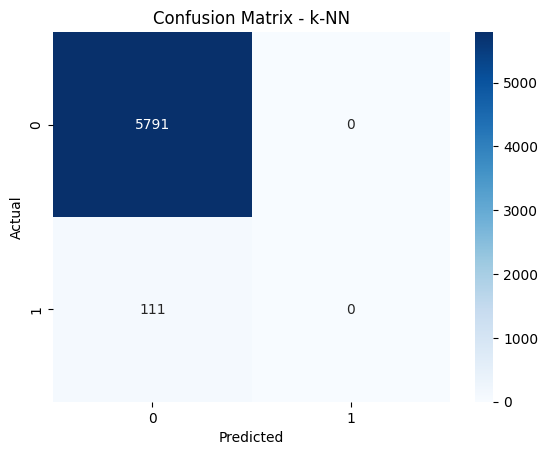

In [36]:
# Define the parameter grid
param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

 
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - k-NN')
plt.show()

## #2 Random Forest Classifier (RF)

c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\base.py", line 666, in _vali

Best parameters found:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100}
Best accuracy:  0.9790865489168041
Accuracy:  0.9835648932565232
Recall:  0.16216216216216217
Precision:  0.8181818181818182
F1-Score:  0.2706766917293233


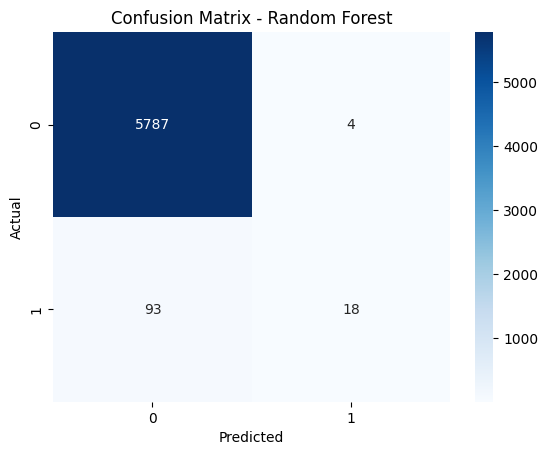

In [37]:
rf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred)) 

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## #3 Decision Tree Classifier (DTC)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best accuracy:  0.9774887937294968
Accuracy:  0.9805150796340224
Recall:  0.2882882882882883
Precision:  0.47058823529411764
F1-Score:  0.3575418994413408


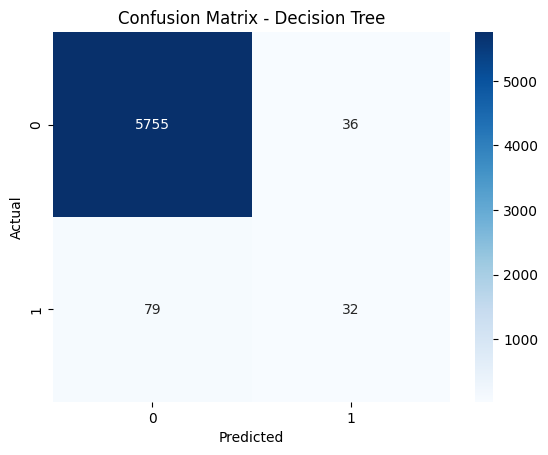

In [38]:
dt_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

## #4 XGboost 

c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}
Best accuracy:  0.9832982877899429
Accuracy:  0.9859369705184683
Recall:  0.3333333333333333
Precision:  0.8043478260869565
F1-Score:  0.4713375796178344


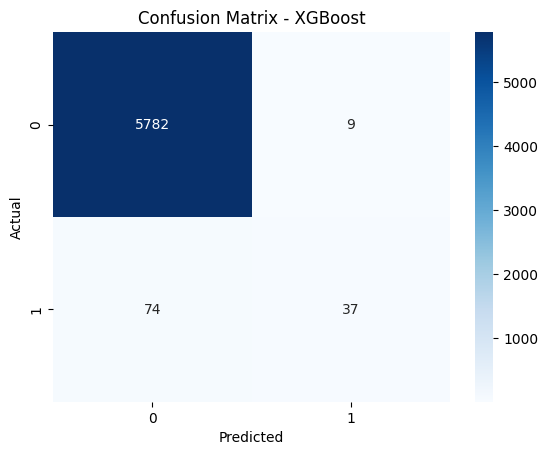

In [39]:
xgb_model = XGBClassifier(random_state=123)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

## #5 Naive Bayes (NB)

Best parameters found:  {}
Best accuracy:  0.07581166875569209
Accuracy:  0.07251779057946459
Recall:  0.972972972972973
Precision:  0.019358307940491128
F1-Score:  0.03796133567662566


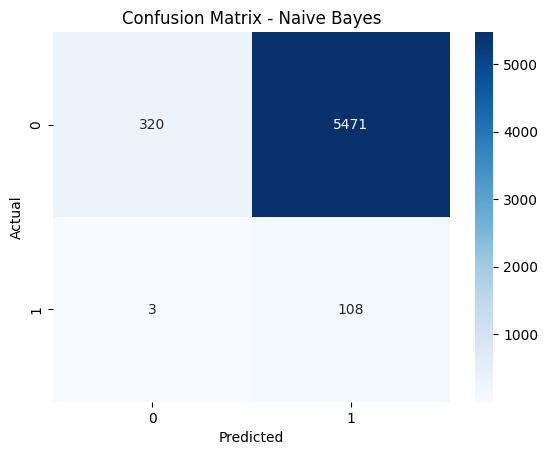

In [40]:
nb_model = GaussianNB()

nb_param_grid = {}

grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

##  " Oversampling STAGE 'No feature Selection' "

## ------------------------------------------------------------------------------------------------------------

 ** Apply SMOTE for oversampling **

In [41]:
smote = SMOTE(random_state=123)
x_sm, y_sm = smote.fit_resample(x_train, y_train)
y_sm.value_counts()

class
0    13457
1    13457
Name: count, dtype: int64

## ------------------------------------------------------------------------------------------------------------

##  #1 k-NN Model with SMOTE (OS)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy:  0.9079661303498019
Accuracy:  0.8461538461538461
Recall:  0.36936936936936937
Precision:  0.04664391353811149
F1-Score:  0.08282828282828283


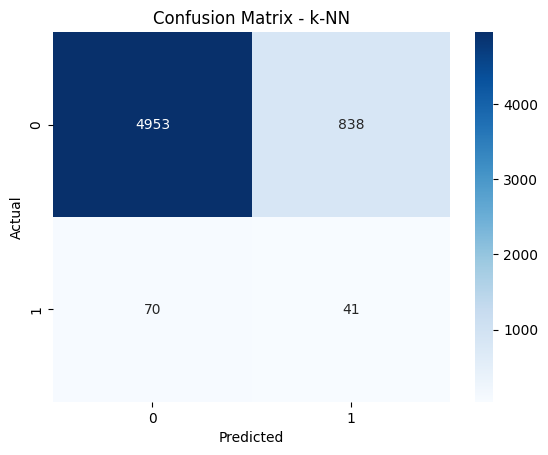

In [42]:
knnO_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=knnO_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_sm, y_sm)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - k-NN')
plt.show()

##  #2 Random Forest Model with SMOTE (OS)

c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\sklearn\base.py", line 666, in _vali

Best parameters found:  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 200}
Best accuracy:  0.9569367497619886
Accuracy:  0.923415791257201
Recall:  0.6306306306306306
Precision:  0.14553014553014554
F1-Score:  0.23648648648648649


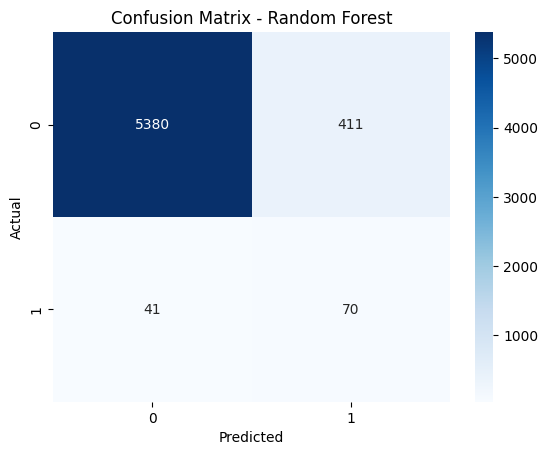

In [43]:

rfO_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rfO_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_sm, y_sm)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

##  #3 Decision Tree Classifier Model with SMOTE (OS)

Best parameters found:  {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.9602808033576394
Accuracy:  0.9459505252456795
Recall:  0.4954954954954955
Precision:  0.17295597484276728
F1-Score:  0.2564102564102564


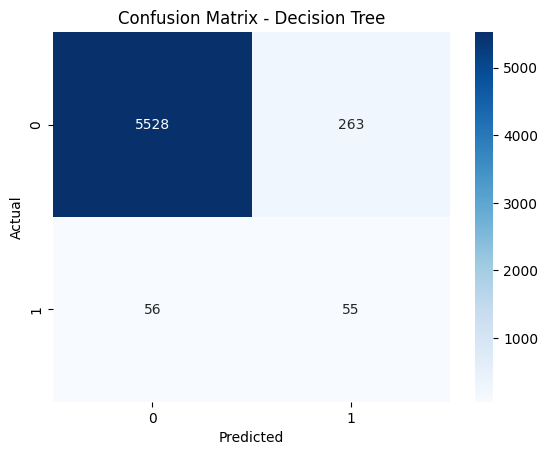

In [44]:
dtO_model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=dtO_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_sm, y_sm)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


##  #4 XGBoost Model with SMOTE (OS)

c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:07:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warn

Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.6}
Best accuracy:  0.9926432104924782
Accuracy:  0.9830565909861064
Recall:  0.6036036036036037
Precision:  0.5447154471544715
F1-Score:  0.5726495726495726


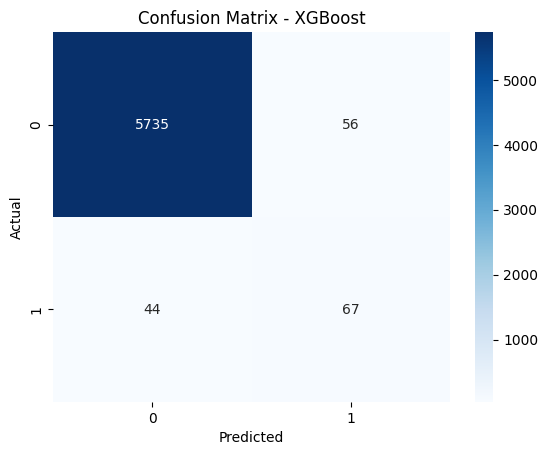

In [45]:
xgbO_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgbO_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_sm, y_sm)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


##  #5 CatBoost Model with SMOTE (OS)

Best parameters found:  {}
Best accuracy:  0.5234079747733844
Accuracy:  0.07895628600474415
Recall:  0.963963963963964
Precision:  0.019317566347716194
F1-Score:  0.037876106194690264


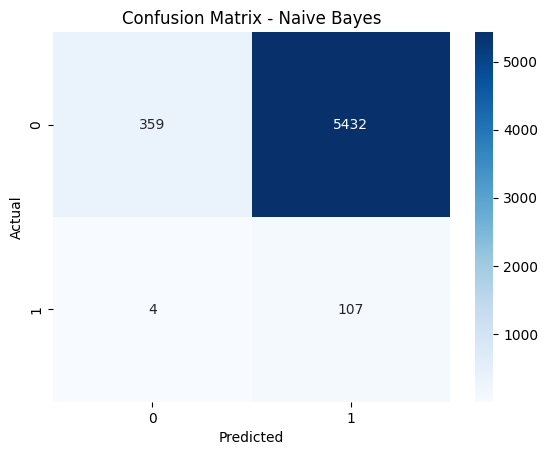

In [46]:
nb_model = GaussianNB()

nb_param_grid = {}

grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_sm, y_sm)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

## ------------------------------------------------------------------------------------------------------------

##  " UNDERSAMPLING STAGE 'No feature Selection' "

## ------------------------------------------------------------------------------------------------------------

In [47]:
rus = RandomUnderSampler(random_state=123)
x_resampled, y_resampled = rus.fit_resample(x_selected, y)

print("Class distribution after resampling:", y_resampled.value_counts())

Class distribution after resampling: class
0    425
1    425
Name: count, dtype: int64


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=123)

print(y_train.value_counts())
print(y_test.value_counts())

class
1    303
0    292
Name: count, dtype: int64
class
0    133
1    122
Name: count, dtype: int64


##  #1 k-NN Model with RandomUndersample (US)

Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best accuracy:  0.7126050420168067
Accuracy:  0.6784313725490196
Recall:  0.7213114754098361
Precision:  0.6470588235294118
F1-Score:  0.6821705426356589


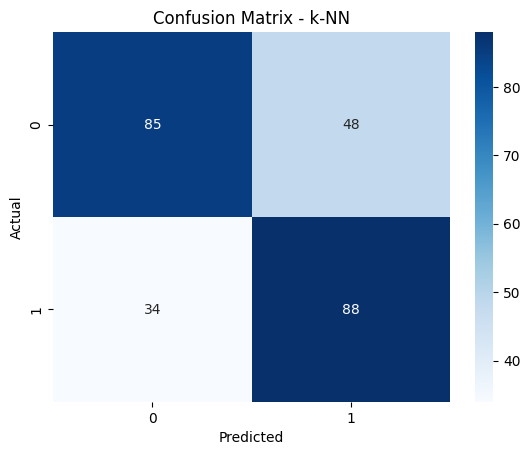

In [50]:
knnU_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=knnU_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - k-NN')
plt.show()


##  #2 Random Forest Model (US)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 200}
Best accuracy:  0.8504201680672268
Accuracy:  0.8117647058823529
Recall:  0.9016393442622951
Precision:  0.7534246575342466
F1-Score:  0.8208955223880597


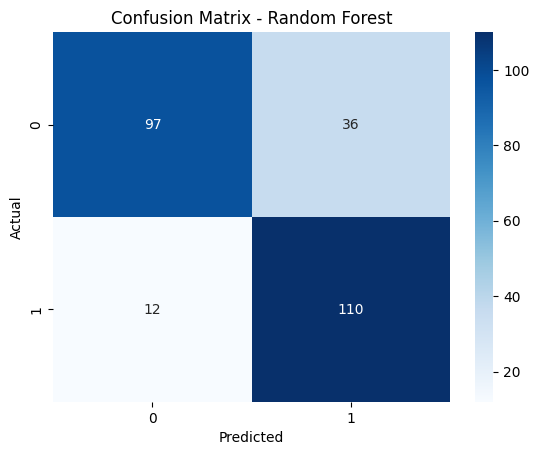

In [51]:
rfU_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rfU_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


##  #3 Decision Tree Classifier Model  (US)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best accuracy:  0.7815126050420168
Accuracy:  0.788235294117647
Recall:  0.8114754098360656
Precision:  0.7615384615384615
F1-Score:  0.7857142857142857


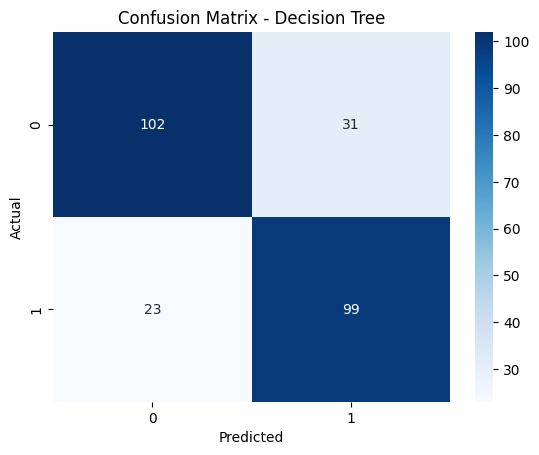

In [52]:
dtU_model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=dtU_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


##  #4 XGBoost Model (US)

c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:48:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:48:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Mohanad alotaibe\Desktop\bankruptcy\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:48:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warn

Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy:  0.8655462184873951
Accuracy:  0.8156862745098039
Recall:  0.8770491803278688
Precision:  0.7697841726618705
F1-Score:  0.8199233716475096


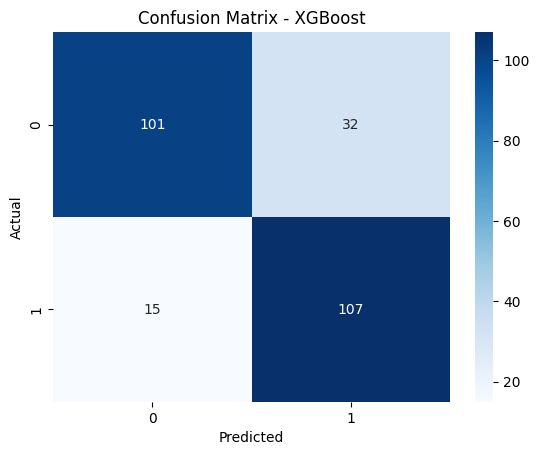

In [53]:
xgbU_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgbU_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


##  #5 CatBoost Model (US)

Best parameters found:  {}
Best accuracy:  0.5428571428571429
Accuracy:  0.5058823529411764
Recall:  0.9672131147540983
Precision:  0.49166666666666664
F1-Score:  0.6519337016574586


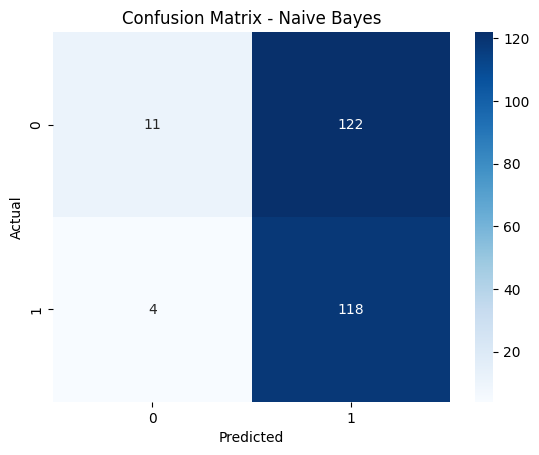

In [54]:
nb_model = GaussianNB()

nb_param_grid = {}

grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()